<a href="https://colab.research.google.com/github/abhishekTP623/sales_data_analysis/blob/main/Retail_Sales_Analysis(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# import require libraries
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')
print("Libraries imported successfully!")

Libraries imported successfully!


#### Data loading

First, we load the dataset and inspect the data types to identify any necessary formatting changes.

In [13]:
import os

df = pd.read_csv('/content/retail_sales_dataset.csv')

display(df.head())

print("\n--- Dataset Info ---")
df.info()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


#### Data Cleaning:

To prepare the dataset for accurate time-series analysis, the Date column is converted from string format to a proper datetime type. Duplicate rows are also checked and removed if necessary to ensure the integrity of the data.

#### Statistical Summary:

Understanding the distribution of our data is crucial before diving into visualization.

In [14]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


#### Time Series Analysis — Monthly Sales Trend

To observe seasonal patterns and identify high-performing months, sales data is aggregated on a monthly basis. This helps reveal long-term trends and fluctuations in customer purchasing behavior.

In [15]:
# Ensure 'Date' column is datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df = df.set_index('Date')

# Resample monthly and sum Total Amount
monthly_sales = df['Total Amount'].resample('M').sum()

# Display monthly sales
display(monthly_sales.to_frame(name='Total Sales'))

,Total Sales
Date,
2023-01-31,35450
2023-02-28,44060
2023-03-31,28990
2023-04-30,33870
2023-05-31,53150
2023-06-30,36715
2023-07-31,35465
2023-08-31,36960
2023-09-30,23620


#### Plotting the monthly trend

Text(0, 0.5, 'Total sale amount')

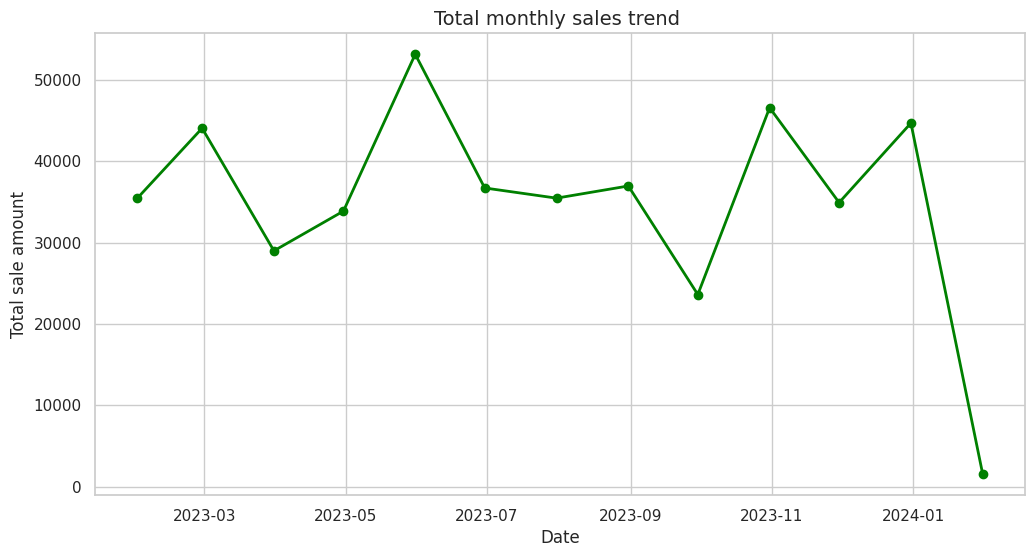

In [16]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', linewidth=2,color='green')

# adding labels
plt.title("Total monthly sales trend ",fontsize=14)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Total sale amount",fontsize=12)


#### 💡 Key Insights

1. Strongest Month: May 2023 showed the highest sales, crossing $52,000, suggesting a potential seasonal peak or effective promotional period.

2. Weakest Month: Sales dipped notably in September 2023, falling to approximately $24,000, pointing toward reduced post-summer consumer activity.

#### Deep Analysis: May 2023 Surge
Given that May recorded the highest sales, we examine this month separately to determine whether the spike was influenced by weekend activity or a particular promotional event.

In [23]:
# filter the may month data
may_datas = df[(df.index.year == 2023) & (df.index.month == 5)].copy()

# Add a 'Day' column to may_datas for grouping
may_datas['Day'] = may_datas.index.day_name()

#calculate the total sales per day only in the may month
may_daily_sales = may_datas.groupby('Day')['Total Amount'].sum()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# reindex
may_daily_sales = may_daily_sales.reindex(days_order)

display(may_daily_sales.to_frame(name='Total sales'))

,Total sales
Day,
Monday,9515
Tuesday,16680
Wednesday,7900
Thursday,4320
Friday,4990
Saturday,4715
Sunday,5030


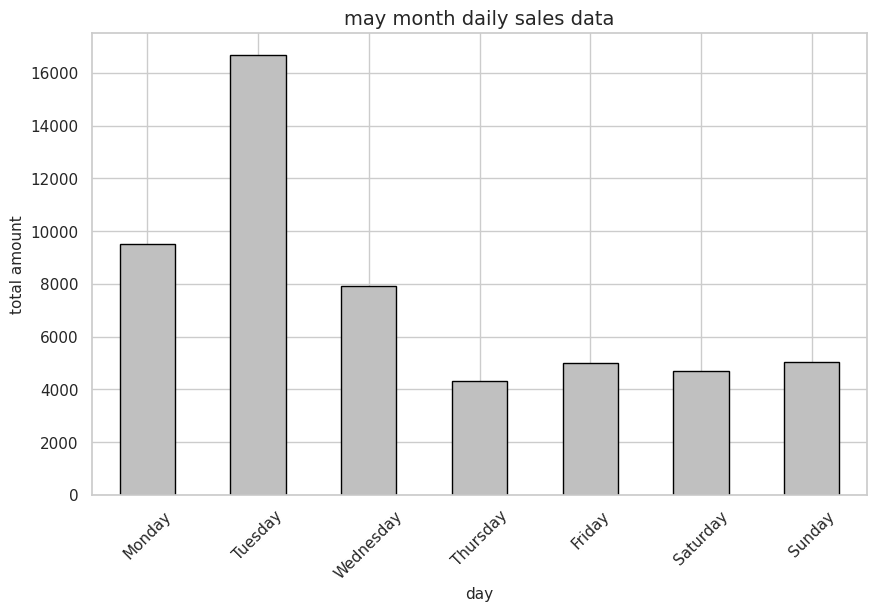

In [24]:
plt.figure(figsize=(10,6))
may_daily_sales.plot(kind='bar',color='silver',edgecolor='black')
plt.title('may month daily sales data',fontsize=14)
plt.xlabel('day',fontsize=11)
plt.ylabel('total amount',fontsize=11)
plt.xticks(rotation=45)

plt.show()


#### Observations:

Tuesday Surged Above All Other Days: May’s revenue peak was driven primarily by unusually high sales on Tuesdays.

Insight: This anomaly suggests a targeted event or customer behavior change exclusive to May. Identifying the cause (e.g., offer periods, festival demand, weekly campaign) could help replicate this performance in other months.

#### Customer Demographics & Product Analysis

Gender-Based Product Performance:

This section explores the relationship between customer gender and product sales performance, helping us understand which segments are driving revenue and which product categories resonate most with each group.

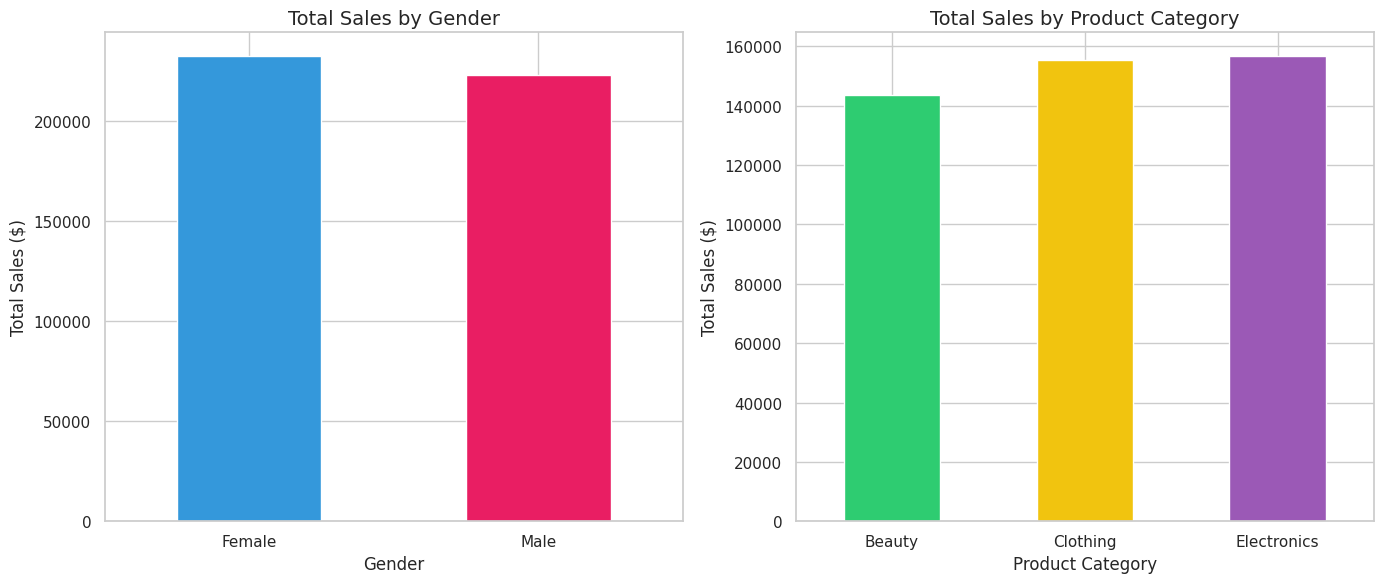

In [19]:
#calculates total sales by gender
gender_sales=df.groupby('Gender')['Total Amount'].sum()

#calculates total sales by product catogery

product_sales=df.groupby('Product Category')['Total Amount'].sum()
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

gender_sales.plot(kind='bar', color=['#3498db', '#e91e63'], ax=axes[0])
axes[0].set_title('Total Sales by Gender', fontsize=14)
axes[0].set_ylabel('Total Sales ($)')
axes[0].tick_params(axis='x', rotation=0)

# Chart 2: Sales by Product Category
product_sales.plot(kind='bar', color=['#2ecc71', '#f1c40f', '#9b59b6'], ax=axes[1])
axes[1].set_title('Total Sales by Product Category', fontsize=14)
axes[1].set_ylabel('Total Sales ($)')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


#### 💡 Insights:

1. Revenue by Gender: Females slightly outperform males in overall sales, indicating balanced engagement across genders.

2. Category Performance: Electronics is the top-performing category, with Clothing and Beauty trailing closely, suggesting where marketing and inventory efforts should focus.

#### Purchasing Behavior by Gender
Understanding how men and women shop across product categories allows targeted promotions, inventory planning, and strategic marketing efforts.

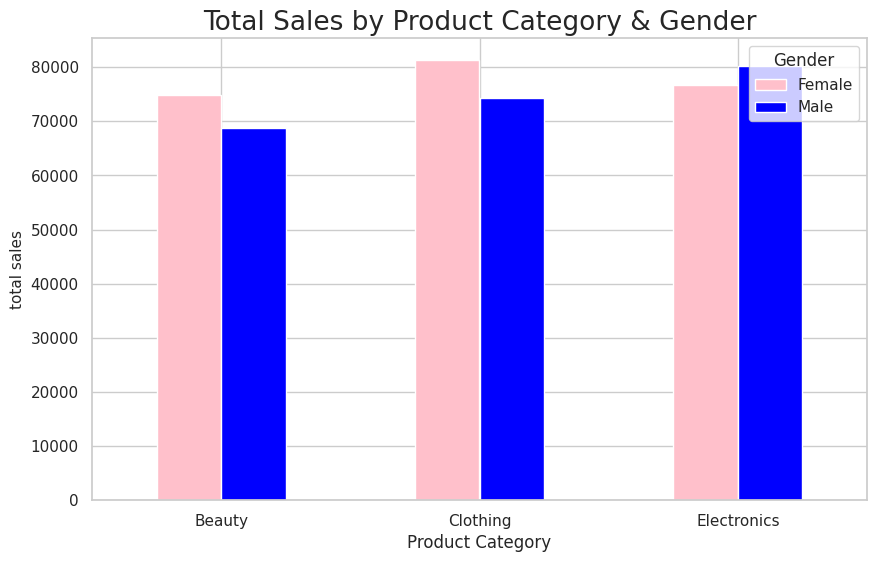

In [18]:
category_gender_sales=df.groupby(['Product Category','Gender'])['Total Amount'].sum().unstack()
category_gender_sales.plot(kind='bar',color=['pink','blue'],figsize=[10,6])
plt.title('Total Sales by Product Category & Gender',fontsize=19)
plt.ylabel('total sales',fontsize=11)
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.show()

#### Key Insights

1. Electronics: Male customers show significantly higher spending in this category.
Strategy: Focus gadget promotions and tech campaigns toward male audiences.

2. Beauty & Clothing: These categories attract more female shoppers.
Strategy: Prioritize women-focused marketing for fashion, skincare, and beauty products.

#### Sales by Age Group

Customers are categorized into Young Adults, Middle-Aged, and Seniors to analyze spending patterns across different generations. This segmentation helps identify which age groups drive the most sales and tailor marketing strategies accordingly.

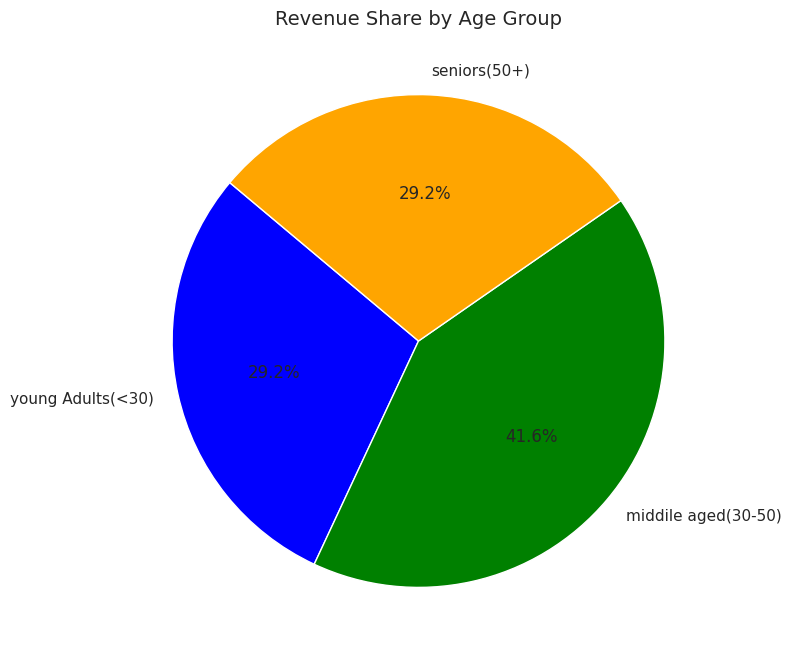

In [21]:
# create age bins
bins=[0,30,50,100]
labels=['young Adults(<30)','middile aged(30-50)','seniors(50+)']
#create a column for age group
df['Age Group']=pd.cut(df['Age'],bins=bins,labels =labels)
# Aggregate sales by Age Group
age_sales=df.groupby('Age Group')['Total Amount'].sum()

# create plot
plt.figure(figsize=(8,8))
plt.pie(
    age_sales,labels=age_sales.index,autopct='%1.1f%%',colors=['blue','green','orange'],startangle=140
)
plt.title('Revenue Share by Age Group', fontsize=14)
plt.show()

#### 💡 Insights:

* Primary Revenue Segment: Customers aged 30–50 generate nearly 41% of total revenue, making them the most influential demographic.

* Strategic Targeting: Their higher disposable income makes them ideal for loyalty programs aimed at retention and long-term value.

#### Correlation Analysis

🔥 The heatmap reveals which numerical factors — like Age and Quantity — meaningfully impact Total Spend.

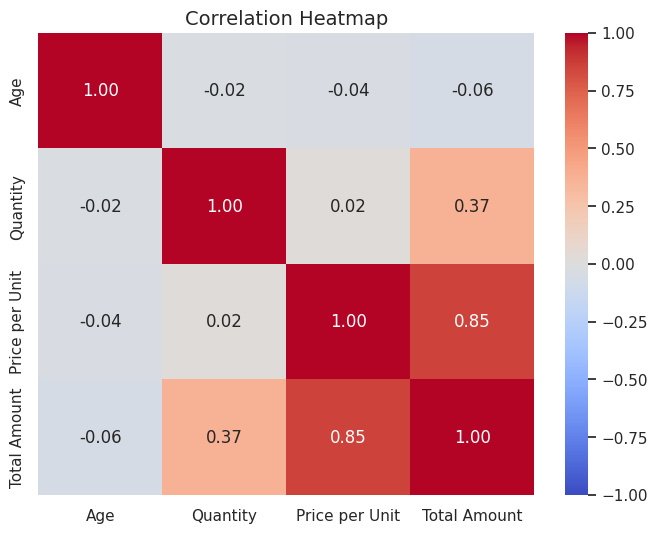

In [22]:
# Select only numerical columns for correlation analysis
numeric_cols = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']]

# Calculate the correlation matrix
correlation = numeric_cols.corr()

# Plotting the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()


#### Key Findings:

* Age doesn’t tell us who spends more—everyone spends similarly.

* Price is the real powerhouse: the higher the price, the bigger the revenue win.

#### Insights

* May leads with $52K; September lags (~$24K).

* October shows a major pre-holiday surge.

* 30–50 age group contributes 41.6% of revenue.

* Females → Beauty/Clothing; Males → Electronics.

* High prices—not volume—drive revenue (corr = 0.85).

#### Recommendations

* Boost marketing for May & October.

* Run promotions in September to recover momentum.

* Prioritize loyalty for middle-aged customers.


#### Conclusion

* Focus on peak months, fix the September slump, and target the top customer segment to maximize profitability.